<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [3]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
import math

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [5]:
with open('sat_scores.csv', 'r') as f:
    data =f.readlines()

data =[x.replace('\n','') for x in data]
header = data[0].split(',')
data_cleaned =[[float(i) if i.isdigit() else i for i in row.split(',')] for row in data[1:]]

#now put the cleaned data into a dictionary 'sat_dict'
sat_dict ={col_name:[row[index] for row in data_cleaned] for index,col_name in enumerate(header)}

pprint(sat_dict)

{'Math': [510.0,
          513.0,
          515.0,
          505.0,
          516.0,
          499.0,
          499.0,
          506.0,
          500.0,
          501.0,
          499.0,
          510.0,
          499.0,
          489.0,
          501.0,
          488.0,
          474.0,
          526.0,
          499.0,
          527.0,
          499.0,
          515.0,
          510.0,
          517.0,
          525.0,
          515.0,
          542.0,
          439.0,
          539.0,
          512.0,
          542.0,
          553.0,
          542.0,
          589.0,
          550.0,
          545.0,
          572.0,
          589.0,
          580.0,
          554.0,
          568.0,
          561.0,
          577.0,
          562.0,
          596.0,
          550.0,
          570.0,
          603.0,
          582.0,
          599.0,
          551.0,
          514.0],
 'Rate': [82.0,
          81.0,
          79.0,
          77.0,
          72.0,
          71.0,
          71.0,
   

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

*Answer*: <br>
- Loading from SAT dictionary, the data need to be cleaned and string values need to be converted into float and then the DataFrame will recognize the correct datatype. 
- Loading directly from csv file using Pandas `.read_csv()` is more efficient and DataFrame will automatically detect the columns which contain numeric values and convert `string` type to `int64`.

In [6]:
#make pandas DataFrame object with sat_dict
sat_dict_df = pd.DataFrame(sat_dict)
print (sat_dict_df.dtypes)

State      object
Rate      float64
Verbal    float64
Math      float64
dtype: object


In [7]:
#make pandas DataFrame object from file
sat_file_df=pd.read_csv('sat_scores.csv')
print (sat_file_df.dtypes)

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [8]:
sat_df=pd.read_csv('sat_scores.csv')

sat_df.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


*Answer:* <br>
The sat data contains 'State',the acceptance rate - 'rate', and SAT scores of 'Verbal' and 'Math' subject. <br>
- By looking the first ten rows only, it seems that different states has different standards for admission as some states are more strict. 
- It seems *Math* subject has more influence over the *acceptance rate*.


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [42]:
#create a description dictionary
header_desc={'State':'US State Code', 
            'Rate':'Colledge Acceptance Rate',
           'Verbal':'SAT Verbal Score',
           'Math':'SAT Math Score'}

#initialize a empty dictionary to hold information later
data_dict = {x:{} for x in list(sat_df.columns)}
data_dict

{'State': {}, 'Rate': {}, 'Verbal': {}, 'Math': {}}

In [45]:
for k,v in data_dict.items():
    data_dict[k].update({'Type':dict(sat_df.dtypes)[k]})
    data_dict[k].update({'Data_description':header_desc[k]})
    
data_dict.update({'Shape':sat_df.shape})

pprint(data_dict)

{'Math': {'Data_description': 'SAT Math Score', 'Type': dtype('int64')},
 'Rate': {'Data_description': 'Colledge Acceptance Rate',
          'Type': dtype('int64')},
 'Shape': (52, 4),
 'State': {'Data_description': 'US State Code', 'Type': dtype('O')},
 'Verbal': {'Data_description': 'SAT Verbal Score', 'Type': dtype('int64')}}


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [51]:
#some simple stats of Rate
print ('Median ' + str(np.median(np.array(sat_df['Rate']))))
print ('Mode ' + str(stats.mode(np.array(sat_df['Rate']))))
print ('Skewness: ' + str(stats.skew(np.array(sat_df['Rate']))))
sat_df['Rate'].describe()

Median 33.5
Mode ModeResult(mode=array([4], dtype=int64), count=array([3]))
Skewness: 0.1413022267791335


count    52.000000
mean     37.153846
std      27.301788
min       4.000000
25%       9.000000
50%      33.500000
75%      63.500000
max      82.000000
Name: Rate, dtype: float64

In [56]:
#create bin size according to Sturge's Rule
bin_size=1 + int(3.322*(math.log10(sat_df['Rate'].count())))
bin_size

6

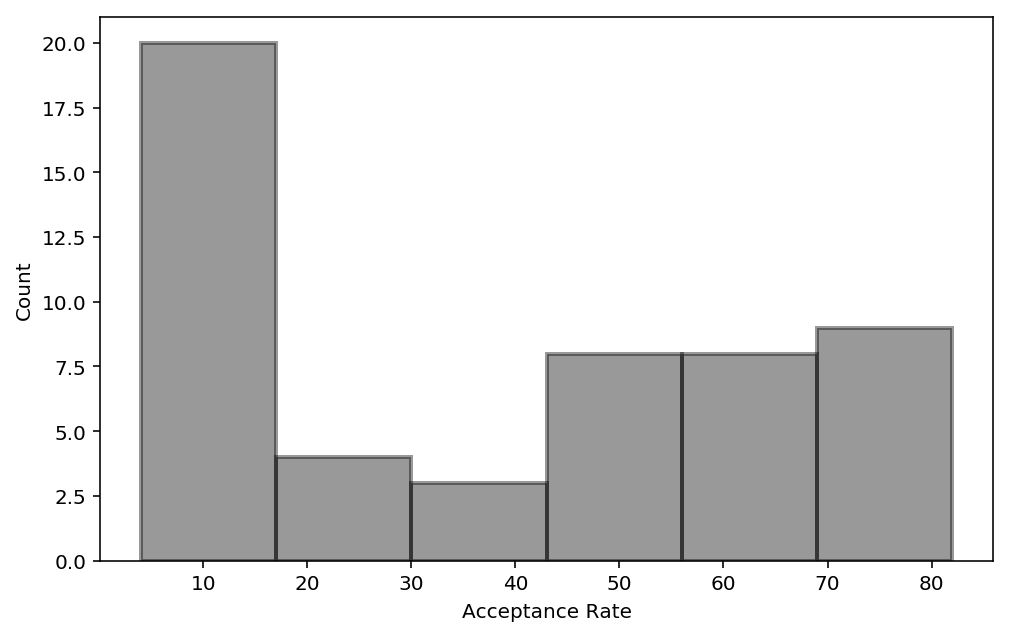

In [61]:
#create a function to plot distribution
def dist_plt(col='Rate',xlab='Acceptance Rate',ylab='Count',color='k'):
    plt.figure(figsize=(8,5))
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    sns.distplot(np.array(sat_df[col]),bins=bin_size,kde=False,color=color,hist_kws=dict(edgecolor='k',linewidth=2))
    plt.show()
    
#Use the default func to plot distribution of Rate
dist_plt()

In [62]:
#some simple stats of Math
print ('Median ' + str(np.median(np.array(sat_df['Math']))))
print ('Mode ' + str(stats.mode(np.array(sat_df['Math']))))
print ('Skewness: ' + str(stats.skew(np.array(sat_df['Math']))))
sat_df['Math'].describe()

Median 521.0
Mode ModeResult(mode=array([499], dtype=int64), count=array([6]))
Skewness: 0.1666193763140798


count     52.000000
mean     531.500000
std       36.014975
min      439.000000
25%      504.000000
50%      521.000000
75%      555.750000
max      603.000000
Name: Math, dtype: float64

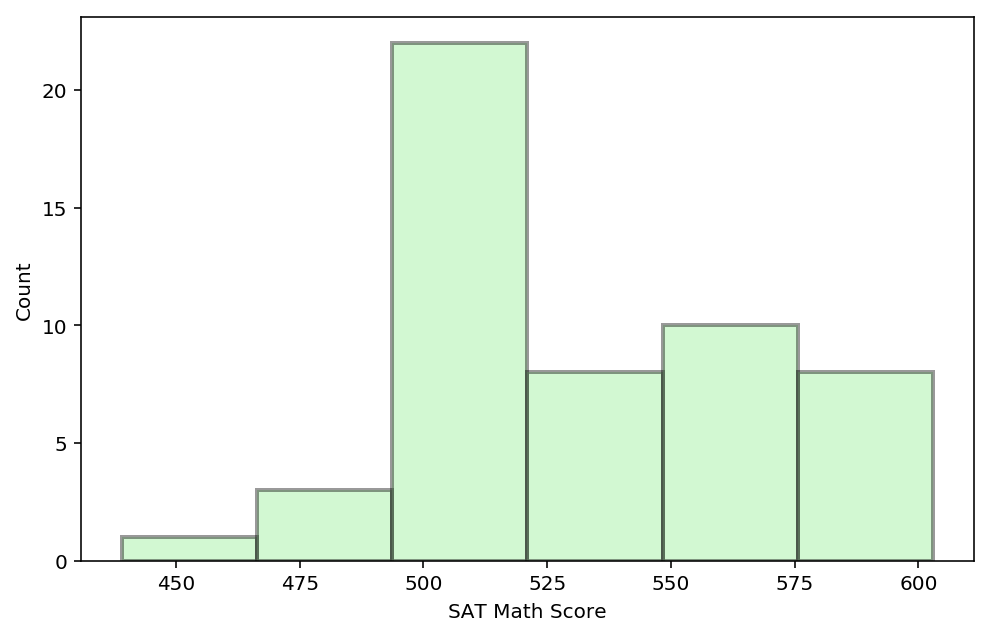

In [63]:
#plot distribution of Math
dist_plt(col='Math',xlab='SAT Math Score',color='lightgreen')

In [64]:
#some simple stats of Verbal
print ('Median ' + str(np.median(np.array(sat_df['Verbal']))))
print ('Mode ' + str(stats.mode(np.array(sat_df['Verbal']))))
print ('Skewness: ' + str(stats.skew(np.array(sat_df['Verbal']))))
sat_df['Verbal'].describe()

Median 526.5
Mode ModeResult(mode=array([562], dtype=int64), count=array([3]))
Skewness: 0.25274196170211655


count     52.000000
mean     532.019231
std       33.236225
min      482.000000
25%      501.000000
50%      526.500000
75%      562.000000
max      593.000000
Name: Verbal, dtype: float64

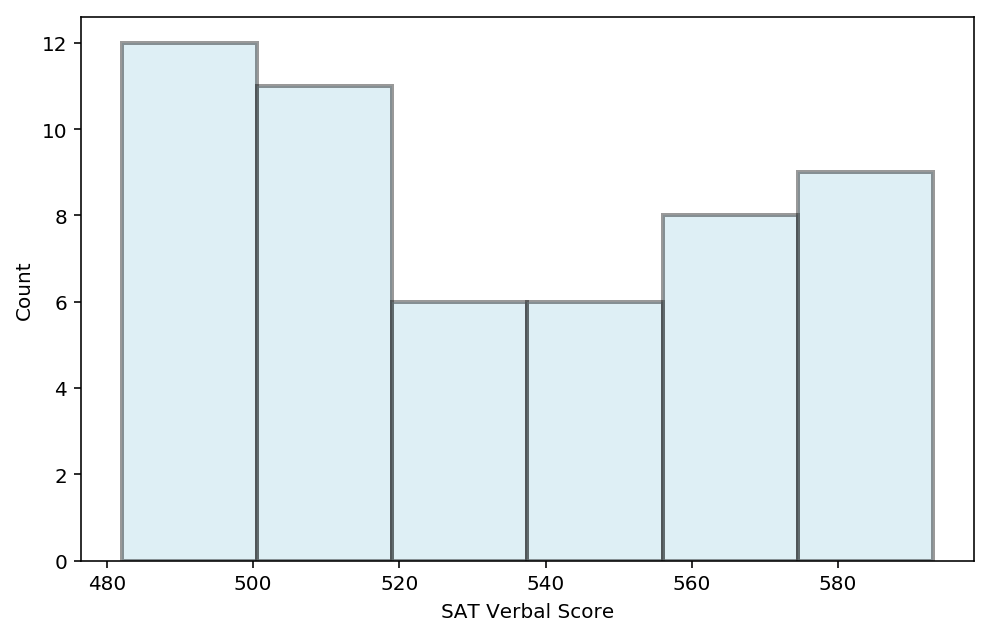

In [65]:
#plot distribution of Verbal
dist_plt(col='Verbal',xlab='SAT Verbal Score',color='lightblue')

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

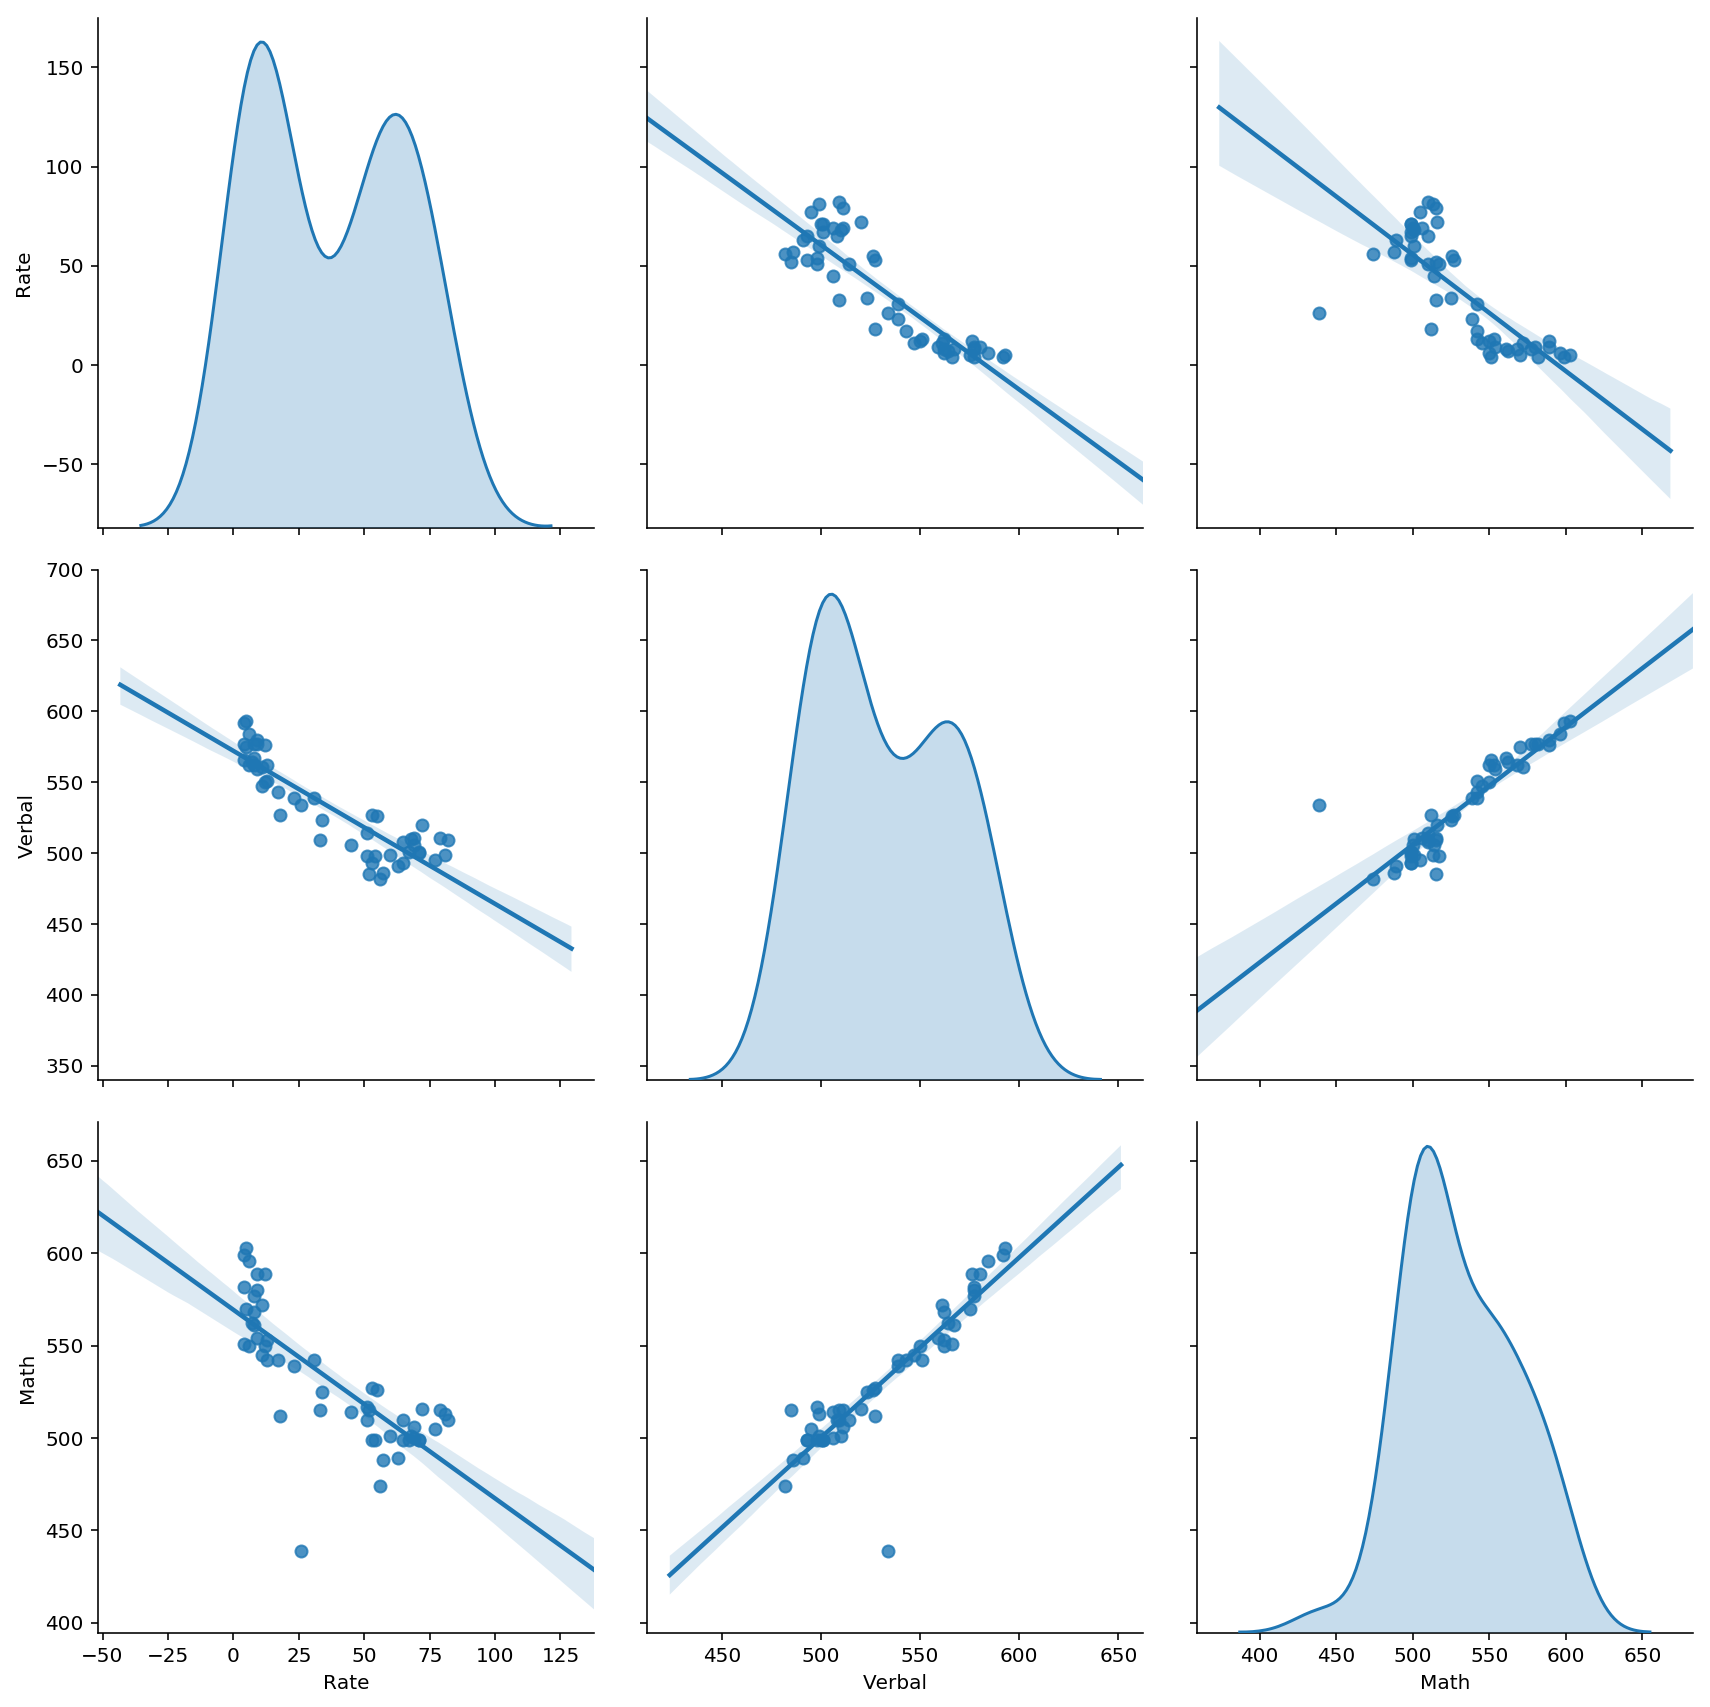

In [80]:
# plot the joint distribution 
# Somehow, this gives me a warning message
#import warnings
#warnings.filterwarnings('ignore')

sns.pairplot(sat_df,kind='reg',diag_kind='kde',size=4)

*Answer:* <br>
- The visualization showed us the distribution of Rates, Verbal and Math are not normally distributed. 
- Rates tends to have negative linear relationship with Verbal and Math. It makes as the cut-off SAT scores are higher, the acceptance rate would be lower.
- Math and Verbal shows a positive linear relationship. Probably the college admission think numerical and verbal performance are important.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

<Figure size 1440x720 with 0 Axes>

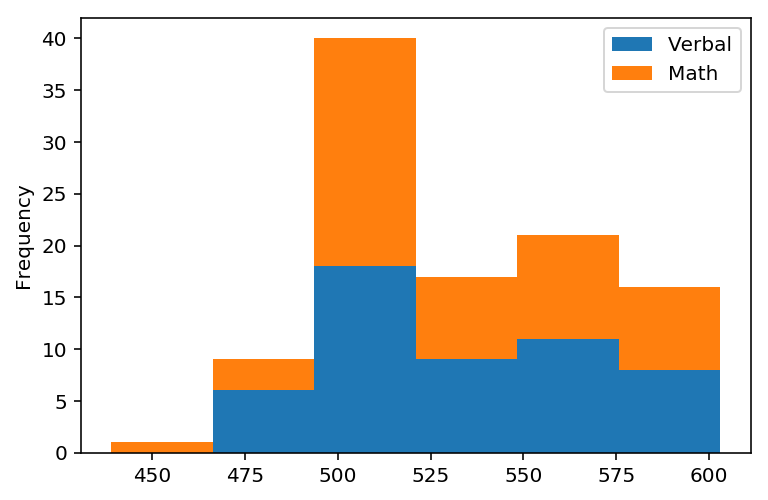

In [103]:
plt.figure(figsize=(20,10))
ax=fig.gca()
sat_df.hist(ax=ax)
sat_df[['Verbal','Math']].plot.hist(stacked=True,bins=bin_size)

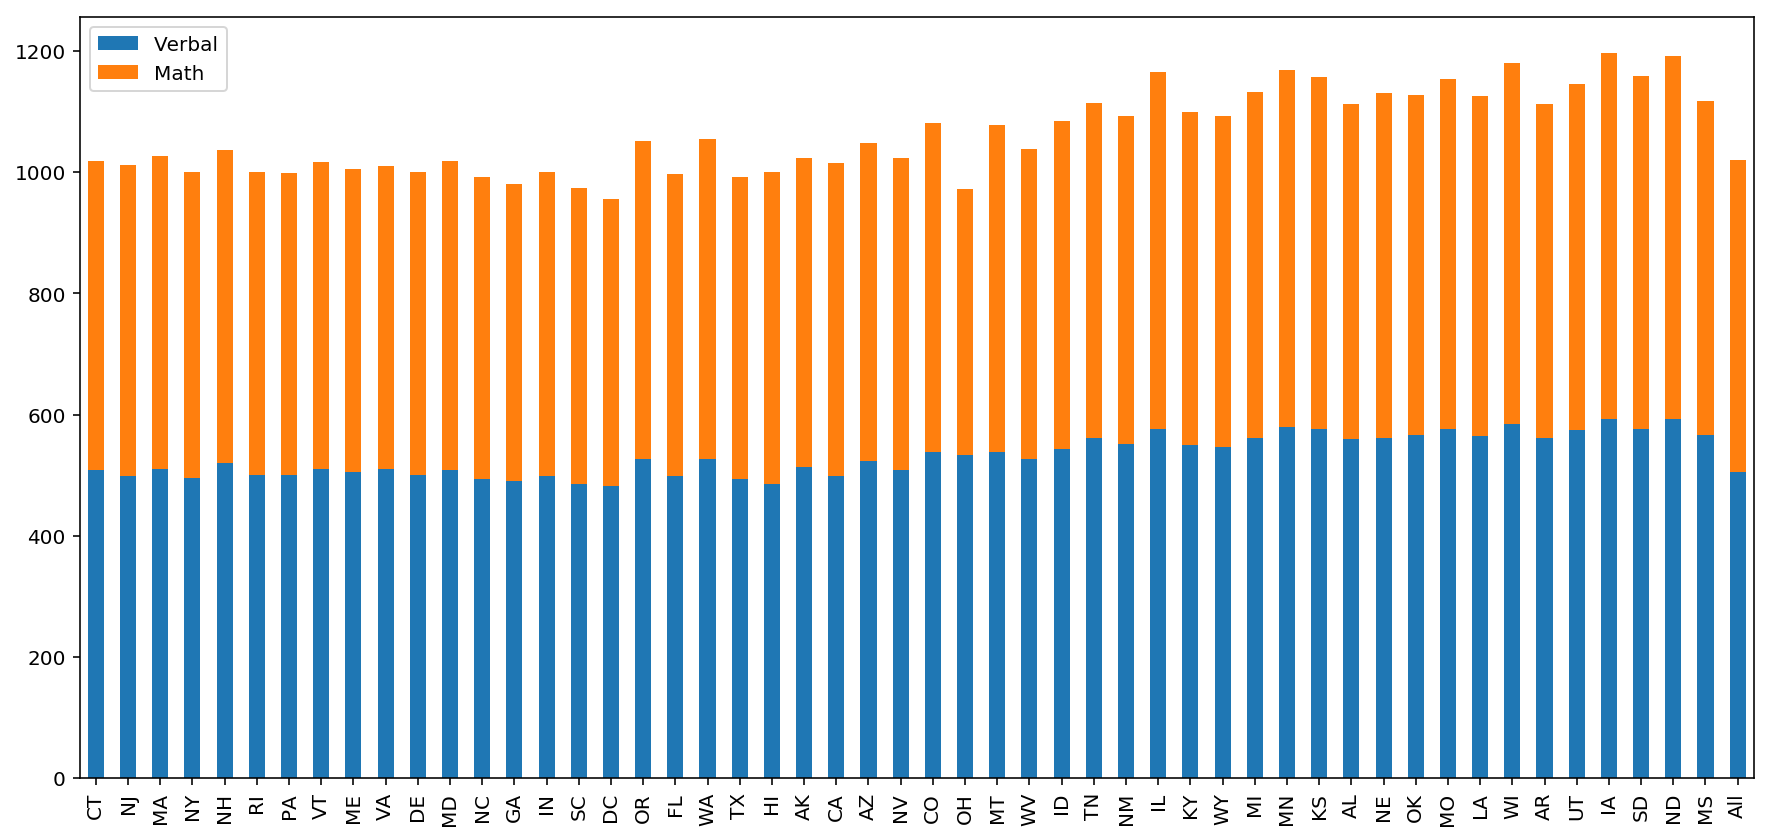

In [86]:
fig = plt.figure(figsize=(15,7))
ax=fig.gca()
sat_df[['Verbal','Math']].plot.bar(stacked=True,ax=ax)
states=sat_df.State
ax.set_xticklabels(states)

plt.show()

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

In [109]:
sat_df[['Verbal','Math']]

,Verbal,Math
0,509,510
1,499,513
2,511,515
3,495,505
4,520,516
5,501,499
6,500,499
7,511,506
8,506,500
9,510,501


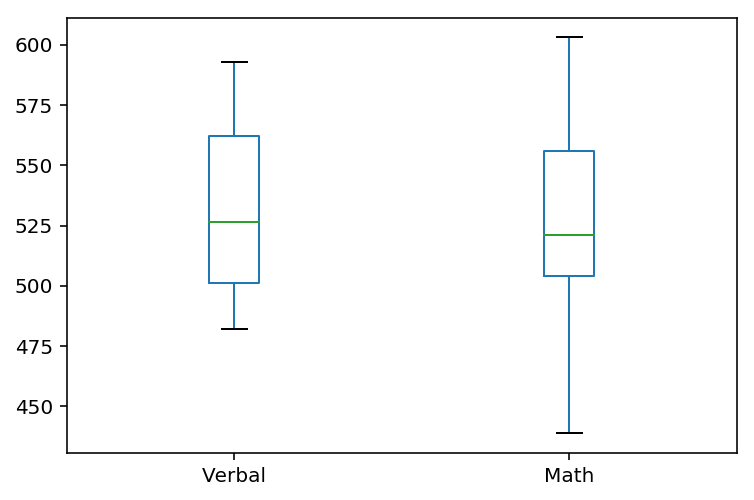

In [104]:
sat_df[['Verbal','Math']].plot.box()

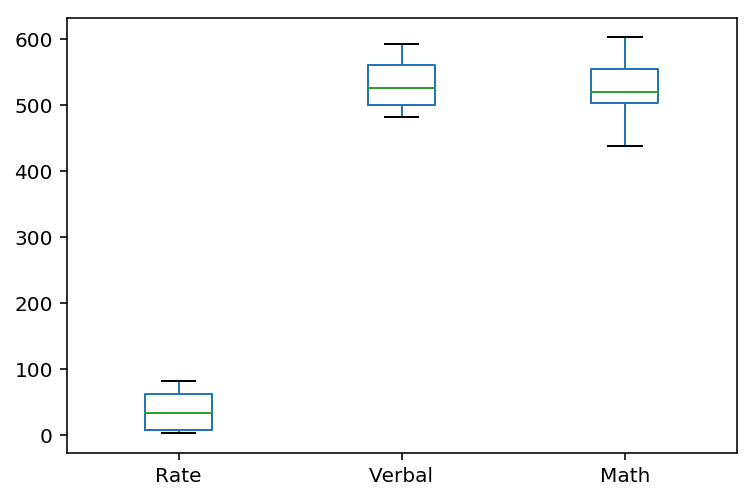

In [105]:
#this is just to explore what it will look like if we plot all together
sat_df[['Rate','Verbal','Math']].plot.box()

*Answer*:<br>
- Compared to a scatterplot or a histogram, using boxplot is an efficient way to show a clear summary of one or more sets of data. It is very useful for quickly summarizing and comparing different sets of results. For example, from the boxplot plotted here, we can quickly sense that SAT Verbal Scores has a smaller variance compared to SAT Math Scores.
- Since the Rate is a percentage value, it is on a much smaller scale compared to the SAT scores. Thus, it's very difficult for people to compare them if we were to plot them on a same graph. 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


In [145]:
#normalize the datasets
def norm_data(data):
    data=np.array(data)
    mean=data.mean()
    std=data.std()
    data_normed=(data - mean)/std
    return data_normed

#create normalized sat dataframe 
normed_sat_df=pd.DataFrame({
    'Verbal':norm_data(sat_df['Verbal']),
    'Math':norm_data(sat_df['Math']),
    'Rate':norm_data(sat_df['Math'])
})
normed_sat_df.head(2)

,Verbal,Math,Rate
0,-0.699352,-0.602798,-0.602798
1,-1.003164,-0.518687,-0.518687


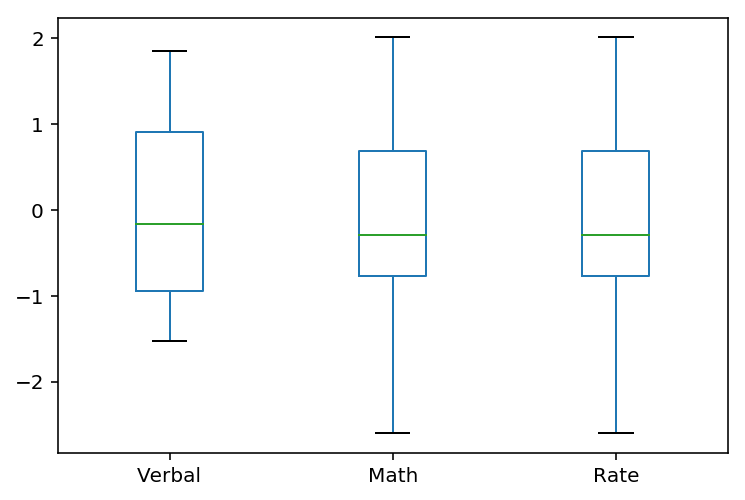

In [134]:
normed_sat_df[['Verbal','Math','Rate']].plot.box()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




*Answer:*<br>
- There are 24 states above the mean
- 47% of states have Verbal scores above the mean, which means nearly 50% of scores are on the left side of the mean. The distribution is not significantly positively nor negativley skewed.

In [9]:
#All is not a state, thus remove it before doing analysis
sat_df_2=sat_df.drop(sat_df.index[51])
sat_df_2.tail(2)

,State,Rate,Verbal,Math
49,ND,4,592,599
50,MS,4,566,551


In [162]:
statesAboveMean=sat_df_2[sat_df_2['Verbal']>sat_df_2['Verbal'].mean()]
len(statesAboveMean)

24

In [152]:
perAboveMean=round(statesAboveMean/len(sat_df_2['Verbal']),2)*100
perAboveMean

47.0

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

*Answer:*<br>
- The number of states greater than the median of Verbal is also 24, same as the number of list greater than the mean.
- The states on both lists are actually the same
- The mean and median value of Verbal are very close

In [165]:
print (sat_df_2['Verbal'].median(),sat_df_2['Verbal'].mean())

527.0 532.5294117647059


In [167]:
statesAboveMedian=sat_df_2[sat_df_2['Verbal']>sat_df_2['Verbal'].median()]
statesAboveMedian

,State,Rate,Verbal,Math
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550
35,WY,11,547,545
36,MI,11,561,572


In [154]:
len(statesAboveMedian)

24

In [164]:
statesAboveMedian['State']==statesAboveMean['State']

26    True
27    True
28    True
30    True
31    True
32    True
33    True
34    True
35    True
36    True
37    True
38    True
39    True
40    True
41    True
42    True
43    True
44    True
45    True
46    True
47    True
48    True
49    True
50    True
Name: State, dtype: bool

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [185]:
sat_df['Diff_Verbal_Math']=abs(np.array(sat_df['Verbal'])-np.array(sat_df['Math']))
sat_df.head()

,State,Rate,Verbal,Math,Diff_Verbal_Math
0,CT,82,509,510,1
1,NJ,81,499,513,14
2,MA,79,511,515,4
3,NY,77,495,505,10
4,NH,72,520,516,4


In [10]:
#similarly do this for the df without All
sat_df_2['Diff_Verbal_Math']=abs(np.array(sat_df_2['Verbal'])-np.array(sat_df_2['Math']))
sat_df_2.head()

,State,Rate,Verbal,Math,Diff_Verbal_Math
0,CT,82,509,510,1
1,NJ,81,499,513,14
2,MA,79,511,515,4
3,NY,77,495,505,10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [175]:
#create the first DataFram where Verbal is greater than Math
Top10_Verbal_greater_Math_df=(sat_df_2[sat_df_2['Verbal']>sat_df_2['Math']]).sort_values(by='Diff_Verbal_Math',ascending=False).head(10)

#print the top 3 states that Verbal is greater than Math
print (Top10_Verbal_greater_Math_df.head(3))

   State  Rate  Verbal  Math  Diff_Verbal_Math
27    OH    26     534   439                95
29    WV    18     527   512                15
50    MS     4     566   551                15


In [176]:
#create the first DataFram where Math is greater than Verbal
Top10_Math_greater_Verbal_df=(sat_df_2[sat_df_2['Math']>sat_df_2['Verbal']]).sort_values(by='Diff_Verbal_Math',ascending=False).head(10)

#print the top 3 states that Verbal is greater than Math
print (Top10_Math_greater_Verbal_df.head(3))

   State  Rate  Verbal  Math  Diff_Verbal_Math
21    HI    52     485   515                30
23    CA    51     498   517                19
1     NJ    81     499   513                14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


*Answer:*<br>
- Rate is negatively correlated with Verbal or Math
- Verbal and Math are postively correlated with one another

In [11]:
#drop Diff_Verbal_Math col
sat_df_cln=sat_df_2.drop('Diff_Verbal_Math',axis=1)

In [12]:
sat_df_cln.corr()

,Rate,Verbal,Math
Rate,1.000000,-0.888121,-0.773419
Verbal,-0.888121,1.000000,0.899909
Math,-0.773419,0.899909,1.000000


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

*Answer:*<br>
- count: the number of datapoints 
- mean: the average of values of all rows in the column
- std: the standard deviation of values of all rows in the column
- min: the minimum  of values of all rows in the column
- 25%: 25th percentile of values of all rows in the column
- 50%: 50th percentile or median of values of all rows in the column
- 75%: 75th percentile of values of all rows in the column
- max: maximum of values of all rows in the column

In [13]:
sat_df_cln.describe()

,Rate,Verbal,Math
count,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137
std,27.550681,33.360667,36.287393
min,4.000000,482.000000,439.000000
25%,9.000000,501.000000,503.000000
50%,33.000000,527.000000,525.000000
75%,64.000000,562.000000,557.500000
max,82.000000,593.000000,603.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

*Answer:*<br>
1. Covariance matrix gives the covariance between two variables in the data matrix. It is a more generalized form of a correlation matrix. Correlation standardise the data and should be used when the scales of data are different. Correlation can tell us how strong the pairs are related directly.
2. Correlation is obtained using covariance devided by the product of standard deviation of each variable.
3. Correlation matrix is standardized with the range between -1 to 1, thus easier for examining relationships.


In [14]:
covariance=sat_df_cln[['Rate','Verbal','Math']].cov()
print (covariance)

          Rate       Verbal         Math
Rate    759.04  -816.280000  -773.220000
Verbal -816.28  1112.934118  1089.404706
Math   -773.22  1089.404706  1316.774902


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

*Answer:*<br>
- Yes, the data requires cleaning after insepcting the data. 
- It is noticed that if the drug-use is 0, then drug-frenquency entry will be '-' rather than 0. Thus, all the entries with '-' need to be replaced with 0. 
- Column *age and n* do not need cleaning as 'age' are categorical variabl and *n* represents number of people in that age group, thus it does not make sense to convert it to float. However, all other columns entries should be convert to float.
- Other problem: for exmaple,  row 1 (age=13) , crack usage 0 but with frequency of 3.0. This is probably because of the rounding. The usage maybe very close to 0.


In [16]:
drug_df_raw =pd.read_csv('drug-use-by-age.csv')
drug_df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [26]:
#display the first 12 columns
drug_df_raw.iloc[:,:12]

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,0.1,35.5
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,-
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,0.1,2.0
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,1.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,66.5
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,0.1,64.0
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,0.4,46.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,0.5,180.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,0.9,45.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,0.6,30.0


In [31]:
#display 13th to 20th column  
drug_df_raw.iloc[:,12:20]

,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency
0,0.2,52.0,1.6,19.0,2.0,36.0,0.1,24.5
1,0.6,6.0,2.5,12.0,2.4,14.0,0.1,41.0
2,1.6,3.0,2.6,5.0,3.9,12.0,0.4,4.5
3,2.1,4.0,2.5,5.5,5.5,10.0,0.8,3.0
4,3.4,3.0,3.0,3.0,6.2,7.0,1.1,4.0
5,4.8,3.0,2.0,4.0,8.5,9.0,1.4,6.0
6,7.0,4.0,1.8,4.0,9.2,12.0,1.7,7.0
7,8.6,3.0,1.4,3.0,9.4,12.0,1.5,7.5
8,7.4,2.0,1.5,4.0,10.0,10.0,1.7,12.0
9,6.3,4.0,1.4,2.0,9.0,15.0,1.3,13.5


In [32]:
#display the rest columns
drug_df_raw.iloc[:,20:]

,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


First shorten the column headers, we can use the first two letters represent drugs 
since there aren't same two letters. We then use '_f' to represent frequency. <br>
For example, *tranquilizer-use* now is *tr*, and its freqneucy will be 'tr _ f'.

In [34]:
#shorten headers
headers=drug_df_raw.columns

headers_new={x:x.split('-')[0][:2] if i%2 ==0 else x.split('-')[0][:2] + '_f' for i,x in enumerate(headers) if i>1}

In [37]:
#check new column headers starting from 'alcohol-use'
#headers_new

In [38]:
drug_df_raw.rename(columns=headers_new,inplace=True)

In [42]:
#define a function to replace '-' with 0 and also convert numeric values to float
def to_float(item):
    if item =='-':
        item=float(0)
        return item
    else:
        item=float(item)
        return item
    

In [43]:
drug_df_raw.iloc[:,2:]=drug_df_raw.iloc[:,2:].applymap(to_float)

In [45]:
drug_df_cln=drug_df_raw

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [46]:
drug_df_cln.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age     17 non-null object
n       17 non-null int64
al      17 non-null float64
al_f    17 non-null float64
ma      17 non-null float64
ma_f    17 non-null float64
co      17 non-null float64
co_f    17 non-null float64
cr      17 non-null float64
cr_f    17 non-null float64
he      17 non-null float64
he_f    17 non-null float64
ha      17 non-null float64
ha_f    17 non-null float64
in      17 non-null float64
in_f    17 non-null float64
pa      17 non-null float64
pa_f    17 non-null float64
ox      17 non-null float64
ox_f    17 non-null float64
tr      17 non-null float64
tr_f    17 non-null float64
st      17 non-null float64
st_f    17 non-null float64
me      17 non-null float64
me_f    17 non-null float64
se      17 non-null float64
se_f    17 non-null float64
dtypes: float64(26), int64(1), object(1)
memory usage: 3.8+ KB


In [47]:
drug_df_cln.describe()

,n,al,al_f,ma,ma_f,co,co_f,cr,cr_f,he,...,ox,ox_f,tr,tr_f,st,st_f,me,me_f,se,se_f
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,...,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,7.411765,0.294118,12.382353,0.352941,...,0.935294,13.941176,2.805882,11.735294,1.917647,31.147059,0.382353,31.735294,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,8.014119,0.235772,17.361532,0.333762,...,0.608216,12.902134,1.753379,11.485205,1.407673,85.973790,0.262762,32.206423,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.200000,4.500000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,5.000000,0.000000,2.000000,0.100000,...,0.400000,5.000000,1.400000,6.000000,0.600000,7.000000,0.200000,10.500000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,5.000000,0.400000,6.000000,0.200000,...,1.100000,12.000000,3.500000,10.000000,1.800000,10.000000,0.400000,24.000000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,7.000000,0.500000,15.000000,0.600000,...,1.400000,17.500000,4.200000,11.000000,3.000000,12.000000,0.600000,46.000000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,36.000000,0.600000,62.000000,1.100000,...,1.700000,46.000000,5.400000,52.000000,4.100000,364.000000,0.900000,105.000000,0.500000,104.000000


In [48]:
sns.pairplot(drug_df_cln)

In [53]:
# Seperate uses and frequency
column_names= list(drug_df_cln.columns)
column_names

['age',
 'n',
 'al',
 'al_f',
 'ma',
 'ma_f',
 'co',
 'co_f',
 'cr',
 'cr_f',
 'he',
 'he_f',
 'ha',
 'ha_f',
 'in',
 'in_f',
 'pa',
 'pa_f',
 'ox',
 'ox_f',
 'tr',
 'tr_f',
 'st',
 'st_f',
 'me',
 'me_f',
 'se',
 'se_f']

In [55]:
#manually assign to list_u , list_f
list_u=[column_names[i] for i in range(2,len(column_names),2)]
print (list_u)

list_f=[column_names[i] for i in range(3,len(column_names),2)]
print (list_f)

['al', 'ma', 'co', 'cr', 'he', 'ha', 'in', 'pa', 'ox', 'tr', 'st', 'me', 'se']
['al_f', 'ma_f', 'co_f', 'cr_f', 'he_f', 'ha_f', 'in_f', 'pa_f', 'ox_f', 'tr_f', 'st_f', 'me_f', 'se_f']


In [57]:
#obtain DataFrame of uses and frequencies
drug_u_df=drug_df_cln.drop(columns=list_f)
drug_f_df=drug_df_cln.drop(columns=list_u)

In [61]:
drug_df_cln

,age,n,al,al_f,ma,ma_f,co,co_f,cr,cr_f,...,ox,ox_f,tr,tr_f,st,st_f,me,me_f,se,se_f
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,0.0,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,0.0,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,0.0,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [77]:
# calculate total consumption of each drug by age group: number of people*uses*median frequency
total_use_list=[]

for k, v in dict(zip(list_u,list_f)).items():
    total_use_list.append(list((drug_df_cln['n']*drug_df_cln[k]/100*drug_df_cln[v])))

total_use_list

13

In [95]:
total_use_col_names=[x +'_total_u' for x in list_u]

total_drug_use_df=pd.DataFrame()

for i in range(len(total_use_col_names)):
    total_drug_use_df[total_use_col_names[i]]=total_use_list[i]


In [96]:
total_drug_use_df.insert(0,column='age',value=drug_df_cln['age'])

In [97]:
total_drug_use_df

,age,al_total_u,ma_total_u,co_total_u,cr_total_u,he_total_u,ha_total_u,in_total_u,pa_total_u,ox_total_u,tr_total_u,st_total_u,me_total_u,se_total_u
0,12,327.366,123.112,13.9900,0.000,99.3290,290.992,850.592,2014.560,68.5510,290.9920,11.192,0.000,72.748
1,13,1406.070,1406.070,2.7570,0.000,0.0000,99.252,827.100,926.352,113.0370,210.9105,33.084,13.785,52.383
2,14,2526.760,5829.696,15.3560,0.000,5.5840,134.016,362.960,1306.656,50.2560,125.6400,268.032,67.008,92.136
3,15,5178.912,10715.500,59.1200,28.082,5.9120,248.304,406.450,1625.800,70.9440,266.0400,266.040,93.114,354.720
4,16,12262.580,20641.500,214.0600,0.000,203.3570,311.916,275.220,1327.172,134.5520,807.3120,522.918,330.264,18.348
5,17,19470.542,30623.040,303.8000,63.798,194.4320,437.472,243.040,2324.070,255.1920,744.3100,765.576,874.944,98.735
6,18,34783.272,43266.756,395.0400,98.760,454.2960,691.320,177.768,2725.776,293.8110,1451.7720,592.560,148.140,98.760
7,19,51698.088,44548.920,501.2865,22.230,2000.7000,573.534,93.366,2507.544,250.0875,420.1470,440.154,933.660,40.014
8,20,75978.576,46328.400,890.2320,68.130,919.7550,336.108,136.260,2271.000,463.2840,1226.3400,1090.080,245.268,45.420
9,21,101843.456,40394.640,564.9600,200.090,423.7200,593.208,65.912,3177.900,413.1270,642.6420,965.140,28.248,63.558


In [101]:
total_drug_use_df.describe()

,al_total_u,ma_total_u,co_total_u,cr_total_u,he_total_u,ha_total_u,in_total_u,pa_total_u,ox_total_u,tr_total_u,st_total_u,me_total_u,se_total_u
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,83749.707882,29239.283882,526.892676,221.241824,816.890441,345.574471,243.013118,2663.102353,391.929529,822.964559,593.763294,445.459529,163.609235
std,84589.653494,21919.996353,504.150200,461.224847,1010.657394,220.006131,250.681576,1773.904268,438.813896,665.846606,473.937128,476.814802,210.680716
min,327.366000,123.112000,0.000000,0.000000,0.000000,4.896000,0.000000,352.512000,0.000000,24.480000,0.000000,0.000000,0.000000
25%,12262.580000,10715.500000,59.120000,0.000000,99.329000,134.016000,73.456000,1327.172000,78.460000,290.992000,268.032000,67.008000,45.420000
50%,62756.928000,30623.040000,420.480000,63.798000,423.720000,311.916000,177.768000,2324.070000,255.192000,744.310000,481.152000,245.268000,92.136000
75%,115419.200000,43266.756000,890.232000,137.730000,919.755000,517.836000,275.220000,3177.900000,425.736000,1103.760000,965.140000,674.877000,160.685000
max,288249.000000,69512.976000,1662.975000,1773.840000,2977.177500,734.292000,850.592000,7060.500000,1400.332500,2485.296000,1694.520000,1537.328000,815.984000


Some analysis for the total drug usage by age group

In [116]:
#total drug usage by age group 
tdu_age=total_drug_use_df.iloc[:,1:].sum(axis=1)
tdu_age_df=tdu_age.to_frame()
tdu_age_df.insert(0,column='age',value=drug_df_cln['age'])
tdu_age_df.set_index('age', inplace=True)
tdu_age_df

,0
age,
12,4163.4240
13,5090.8005
14,10784.1000
15,19318.9380
16,37049.1990
17,56398.9510
18,85178.0310
19,104029.7310
20,129998.8530


Text(0.5,1,'Total Drug Usage by Age')

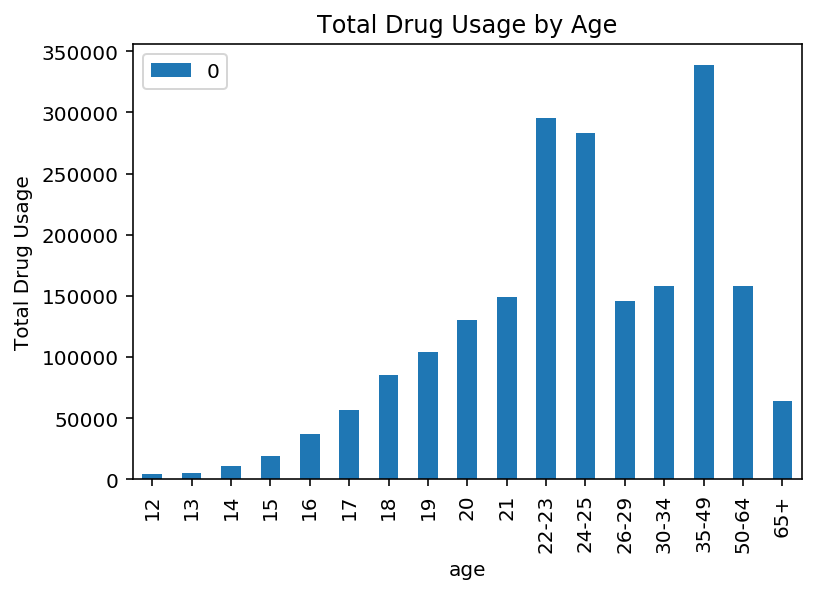

In [117]:
# bar chart for total drug usage by age group
_ =tdu_age_df.plot(kind='bar')
_.set_xlabel('age')
_.set_ylabel('Total Drug Usage')
_.set_title('Total Drug Usage by Age')

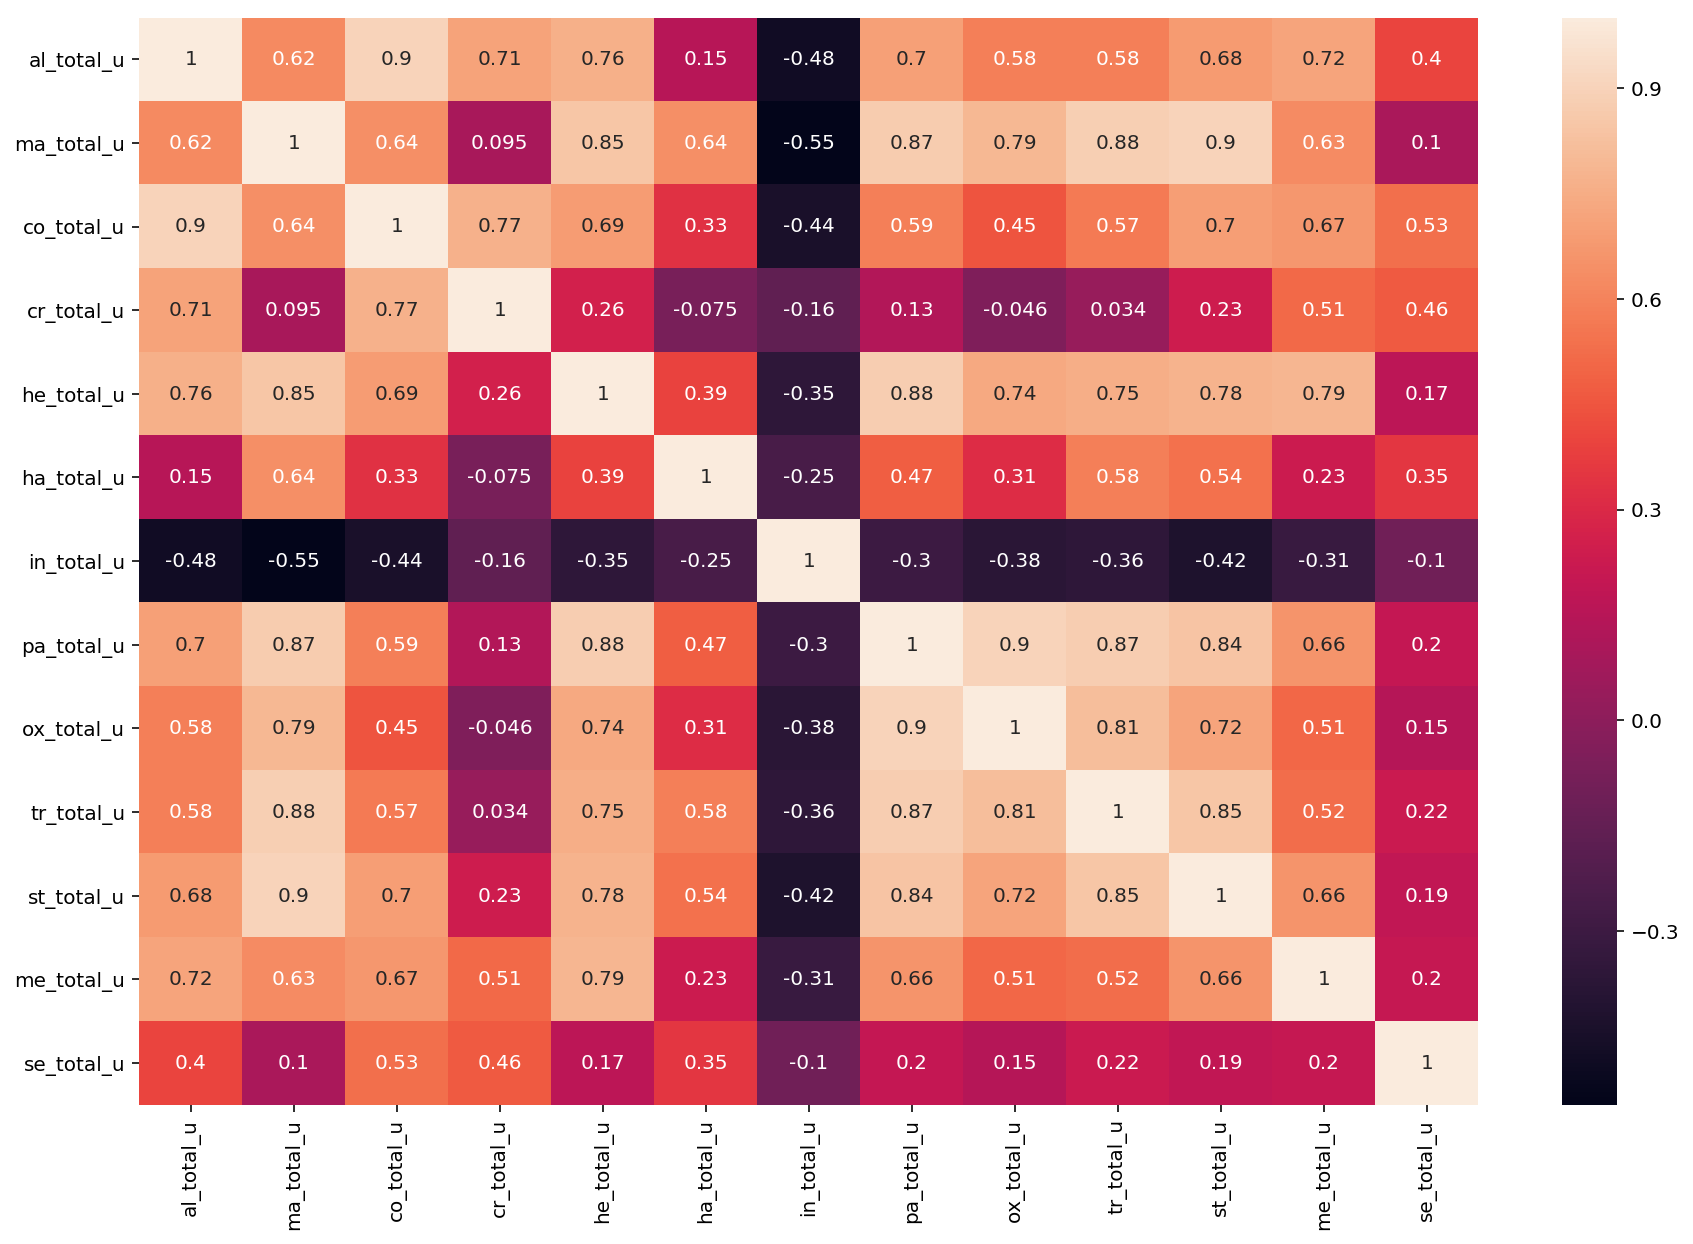

In [118]:
# correlation between total drug usage for all drugs
fig,ax=plt.subplots(figsize=(15,10))
sns.heatmap(total_drug_use_df.corr(),annot=True, ax=ax)

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


*Answer:*
- Questions to explore: People who are younger tend to consume more marijuana compared to older people. The age goups will be divided into two sub-groups: age <= 21 & age >21
- H0: There is no relationship between these two sub-groups, or it does not matter whether younger or older people will consume more marijuana
- H1: There is indeed relationship between these two sub-groups, age does matter. Maybe younger people are more adventurous. 

In [122]:
ma_total_u_age=total_drug_use_df[['age','ma_total_u']]
ma_total_u_age

,age,ma_total_u
0,12,123.112
1,13,1406.070
2,14,5829.696
3,15,10715.500
4,16,20641.500
5,17,30623.040
6,18,43266.756
7,19,44548.920
8,20,46328.400
9,21,40394.640


In [142]:
#now separate two groups of data into age<=21 and age>21
below_21_total_u=ma_total_u_age.iloc[0:10,1].tolist()
below_21_total_u=below_21_total_u[:-4]
below_21_total_u

[123.11200000000001, 1406.07, 5829.695999999999, 10715.5, 20641.5, 30623.04]

In [143]:
below_21_total_u.append(43266.756+44548.920+46328.400+40394.640+69512.976)

In [144]:
below_21_total_u

[123.11200000000001,
 1406.07,
 5829.695999999999,
 10715.5,
 20641.5,
 30623.04,
 244051.692]

In [147]:
below_21_age=ma_total_u_age.iloc[0:6,0].tolist()
below_21_age.append('18-21')
below_21_age

['12', '13', '14', '15', '16', '17', '18-21']

In [150]:
above_21_total_u=ma_total_u_age.iloc[10:,1].tolist()
above_21_age=ma_total_u_age.iloc[10:,0].tolist()

In [153]:
ma_df=pd.DataFrame({'young group age':below_21_age,
                    'young group usage':below_21_total_u,
                    'adult group age':above_21_age,
                    'adult group usage': above_21_total_u
                    })

ma_df


,young group age,young group usage,adult group age,adult group usage
0,12,123.112,22-23,69512.976
1,13,1406.070,24-25,68589.540
2,14,5829.696,26-29,28424.448
3,15,10715.500,30-34,33818.112
4,16,20641.500,35-49,36895.872
5,17,30623.040,50-64,14891.708
6,18-21,244051.692,65+,1057.536


C:\Users\zhixi\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


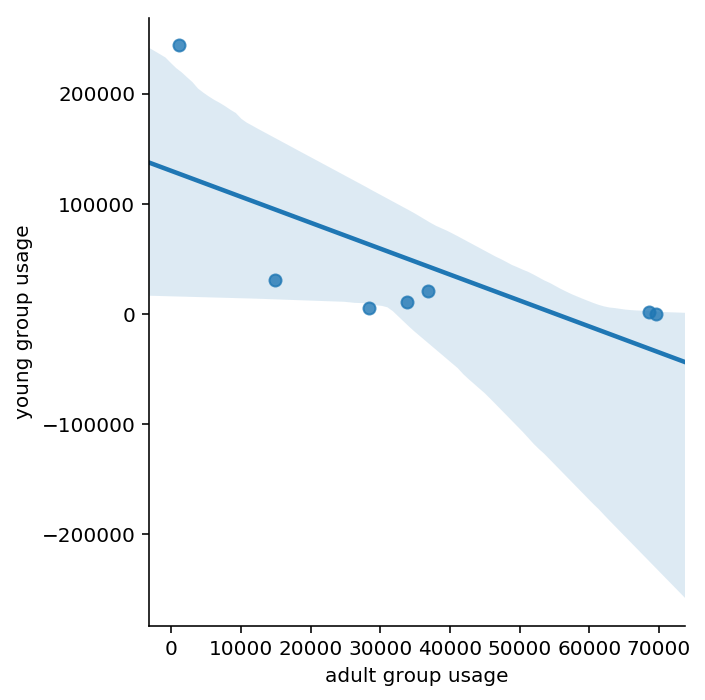

In [156]:
#scatter plot
sns.lmplot(x='adult group usage',y='young group usage', data=ma_df,scatter=True, fit_reg=True)

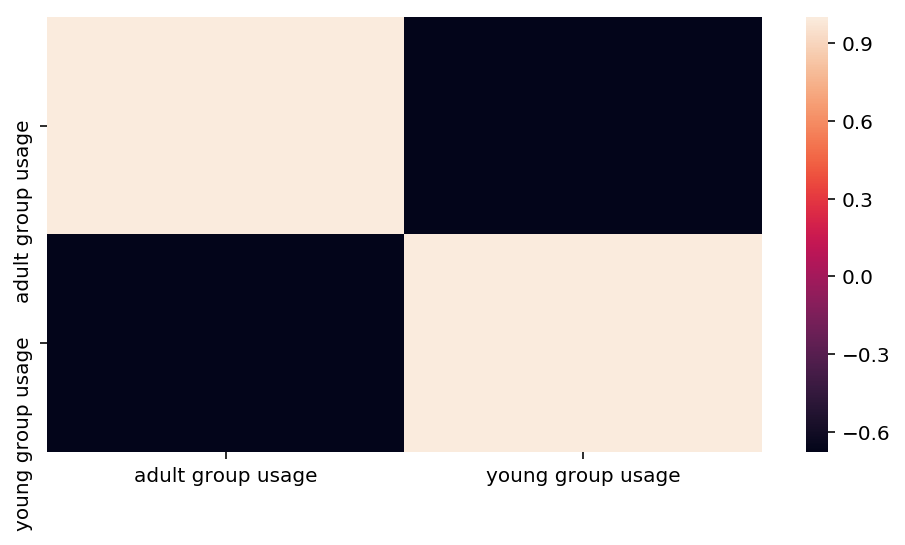

In [157]:
#correlation and heatmap
ma_df_corr=ma_df[['adult group usage','young group usage']].corr()
fig,ax=plt.subplots(figsize=(8,4))
sns.heatmap(ma_df_corr,ax=ax)

In [159]:
#sample correlation
sample_corr=ma_df_corr.iloc[1,0]
sample_corr

-0.6798983736085518

In [160]:
from scipy.stats import ttest_ind

ttest_ind(below_21_total_u,above_21_total_u)

Ttest_indResult(statistic=0.24689490840239844, pvalue=0.8091627946471458)

**Report**

Since the P-value is 0.81 which is pretty big, thus fail to reject the null hypothesis that there is no relationship between the younger group and adult group consumption of marijuana. Age does have an impact.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

*Answer*:There isn't outlier.

In [167]:
#print out rate variables
rate_value=sat_df_cln['Rate'].sort_values()
print(rate_value.tolist())

[4, 4, 4, 5, 5, 6, 6, 7, 8, 8, 8, 9, 9, 9, 11, 11, 12, 12, 13, 13, 17, 18, 23, 26, 31, 33, 34, 51, 51, 52, 53, 53, 54, 55, 56, 57, 60, 63, 65, 65, 67, 68, 69, 69, 71, 71, 72, 77, 79, 81, 82]


In [172]:
#obtain the IQR value
IQR=stats.iqr(rate_value)
#calculate lower bound
lower=np.percentile(rate_value,25)-1.5*IQR
upper=np.percentile(rate_value,75)+1.5*IQR

In [176]:
for i, v in rate_value.iteritems():
    if v > lower or v< upper:
        pass
    else:
        print ('There is a outlier')

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


*Q1 Ans:* <br>
Spearman correlation evaluates the rank-order correlation which is the monotonic relationship between two variables where these two continuous or ordinal variables tend to change together but not necessarily at a constant rate. The Spearman correlation coefficient is based on the ranked values for each variable rather than the raw data. <br>
Pearson correlation evaluates the linear relationship between two continous variables. The two variables tend to move according to a ratio. 

*Q2 Ans:*<br>
- Step 1:Sort the data in descending order and find the total number of data. In this case, there are 51 datapoints (note that ALL is not a state). Thus, we will rank the highest Verbal score 593 as rank 1 and then next as rank 2 and so on. Note that sorting data is just to assign ranking, not use the sorted data in subsequent calculation.
- Step2: calcualte difference between the ranking differnce between rankings of each row and then calcualte the square of each rank difference. 
- Step3:Load the calcualted values into the formula and get the Spearman Rank Correlation. Notice that if there are tied rankings, the formula will be different.

In [178]:
print (len(sat_df_cln['Verbal']))
print (sat_df_cln['Verbal'].max())

51
593


### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?